In [1]:
import numpy as np
from matplotlib import pyplot as plt


# lets start with easy shit

In [2]:
# plots f along [x1, x2]
# preferably a numpy compatible function?
def plot1dfun(f, x1, x2, dx=0.01):
    xvals = np.arange(x1, x2, dx)
    yvals = f(xvals)
    plt.plot(xvals, yvals)
    plt.show()

In [3]:
# 1d differentiation:

# ideally should return derivative function of f
def diff1d(f, dx=0.01):
    deriv = lambda x: (f(x+dx)-f(x))/dx
    return np.vectorize(deriv)


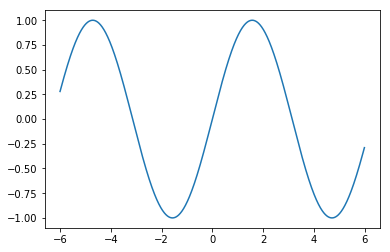

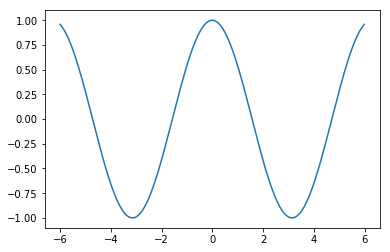

In [4]:
sinx = np.sin
plot1dfun(sinx, -6, 6)
plot1dfun(diff1d(sinx), -6, 6)

In [5]:
# 1d integration
# whew

def int1d(f, x1=0, dx=0.01):
    integral = lambda x, x1=x1: np.sum(f(np.arange(x1, x, dx))) * dx
    return np.vectorize(integral)


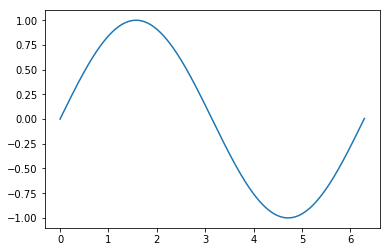

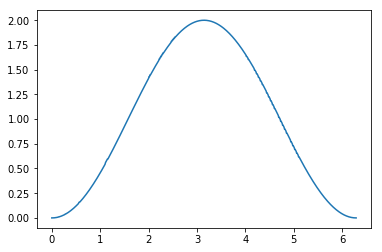

In [6]:
sinx = np.sin
plot1dfun(sinx, 0, 6.3)
plot1dfun(int1d(sinx), 0, 6.3)

In [7]:
# now what
# calc1, calc2 are basically done
# vector calc :^)

# how to deal with vector valued functions:
r = lambda v: (lambda s,t: np.array([s+t, s-t]))(v[0],v[1])
r([0,1])

array([ 1, -1])

In [8]:
# partial differentiation

# returns v+[0,...,dxn,...0]
def dv(n,m,dx):
    dv = np.zeros(m)
    dv[n] = dx
    return dv

# partial derivative of a m-parameter function
# with respect to nth parameter
def diffpartial(n, m, f, dx=0.001):
    # because partial with respect to 0th parameter doesn't make sense
    n -= 1
    pderiv = lambda v: (f(v+dv(n,m,dx))-f(v))/dx
    return pderiv

diffpartial(2,2,r)([0,0])

array([ 1., -1.])

In [84]:
# line integrals
# oh no

# integration
# of: f: R^m -> R 
# along: r: R -> R^m in m-dim space
# between t0, t1
# returns a scalar
def lineintegral(f, r, t0, t1, dt=0.001):
    tvals = np.arange(t0, t1, dt)
    rvals = r(tvals)
    rvals_coord = np.stack(rvals, axis=1)
    
    # turns out np.vectorize is just BS
    fvals = np.array([f(vec) for vec in rvals_coord])


    dr = rvals[:,1:] - rvals[:,:-1]
    ds = np.sqrt(np.sum(dr**2, axis=0))
    fvals_midpoint = (fvals[1:]+fvals[:-1])/2
    f_ds = fvals_midpoint * ds
    
    return np.sum(f_ds)

r = lambda t: np.array([np.vectorize(lambda t: np.cos(t))(t),
                        np.vectorize(lambda t: 0)(t),
                        np.vectorize(lambda t: np.sin(t))(t)
                        ])
f = lambda v: 1
lineintegral(f, r, 0, 2*np.pi)

6.282999738208337

In [49]:
t = [0,1,2,3,4]
r_t = r(t)
print(r_t)
print(np.size(r_t))
n = np.max([np.shape(v) for v in r_t])
print(np.size(r_t), n)
m_t = np.empty((np.size(r_t), n))
print(m_t)

[array([ 2.        ,  1.08060461, -0.83229367, -1.97998499, -1.30728724])
 4
 array([-0.        , -1.68294197, -1.81859485, -0.28224002,  1.51360499])]
3
3 (5,)


TypeError: 'tuple' object cannot be interpreted as an integer

In [44]:
a = np.array([np.array([1,2,3]), np.array([4,5,6])])
a.shape

(2, 3)

In [67]:
t = [0,1,2,3,4]
r_1 = lambda t: np.array([np.cos(t), 0])
r_2 = lambda t: np.array([np.vectorize(lambda t: np.cos(t))(t), np.vectorize(lambda t: 0)(t)])
r_3 = lambda t: (np.vectorize(lambda t: np.array([np.cos(t), 0])))(t)

r_t = lambda t: np.array([np.vectorize(lambda t: np.cos(t))(t),
                          np.vectorize(lambda t: 0)(t),
                          np.vectorize(lambda t: np.sin(t))(t)
                         ])

print(r_1(t))
print(r_2(t))
print(r_t(np.array(t)))

[array([ 1.        ,  0.54030231, -0.41614684, -0.9899925 , -0.65364362])
 0]
[[ 1.          0.54030231 -0.41614684 -0.9899925  -0.65364362]
 [ 0.          0.          0.          0.          0.        ]]
[[ 1.          0.54030231 -0.41614684 -0.9899925  -0.65364362]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.84147098  0.90929743  0.14112001 -0.7568025 ]]


In [136]:
# goal: turn a string like "r(s,t) = <cos(t), sin(t), cos(s), sin(t)>"
# into a compatible vector function

# is this the only way?

r_str = {"parameters": ["s", "t"], "coordinate functions": ["np.cos(t)+1", "s", "t"]}

def createvectorized(r_str, return_string=False):
    r_fargs = ",".join(r_str["parameters"]) # function argument list
    r_fsig = "lambda " + r_fargs + ": " # function signature
    r_dfsig = "np.vectorize(" + r_fsig # coordinate function signature
    # turn coordinate functions into legal python functions
    r_lambda = [r_dfsig + dimfunct + ")(" + r_fargs + ")" for dimfunct in r_str["coordinate functions"]]
    # full vector valued function string, ready for evalutation
    r_full = r_fsig + " np.array([" + ",".join(r_lambda) + "])"
    # output function
    r = eval(r_full)
    if return_string:
        return r, r_full
    return r

r = createvectorized(r_str)

# testing with single parameters
print(r(1,1))

# testing with individual parameter vectors
s = np.array([1,2,3,4])
t = s*10
print(r(s,t))

# testing with *kwargs arguments
st = [s,t]
print(r(*st))

# test with a fucking matrix
st_arr = np.ones((2, 1000))
print(r(*st_arr))

[1.54030231 1.         1.        ]
[[ 0.16092847  1.40808206  1.15425145  0.33306194]
 [ 1.          2.          3.          4.        ]
 [10.         20.         30.         40.        ]]
[[ 0.16092847  1.40808206  1.15425145  0.33306194]
 [ 1.          2.          3.          4.        ]
 [10.         20.         30.         40.        ]]
[[1.54030231 1.54030231 1.54030231 ... 1.54030231 1.54030231 1.54030231]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]


[[1 2 3 4 5]]
lambda t:  np.array([np.vectorize(lambda t: t)(t)])


ValueError: x and y must have same first dimension, but have shapes (629,) and (1, 629)

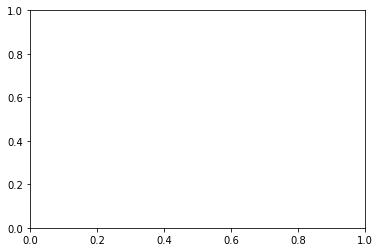

In [140]:
r,s = createvectorized({"parameters": ["t"], "coordinate functions":["t"]}, return_string=True)
print(r([1,2,3,4,5]))
print(s)
plot1dfun(r, 0, 2*3.14159)